In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [44]:
!pip install kaggle

In [45]:
#!kaggle datasets download -d pranavuikey/zomato-eda

In [46]:
# import zipfile
# extract_zip = 'Dataset\zomato-eda.zip'
# extract_zip = zipfile.ZipFile(extract_zip,'r')
# extract_zip.extractall()
# extract_zip.close()

In [47]:
df = pd.read_csv("Dataset/zomato.csv", sep=',')
df.head(3)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


In [48]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [50]:
#df.drop(columns = ['url','address','phone','menu_item'], inplace=True) #cara 1
drop_columns = ['url','address','phone','menu_item','dish_liked','reviews_list','listed_in(city)']
df.drop(drop_columns,axis = 1 ,inplace = True)

In [51]:
df.head(3)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet


In [52]:
df.rename({'listed_in(city)':'city',
            'listed_in(type)':'listed_in',
            'approx_cost(for two people)':'approx_cost',
            'name':'restaurant',
            'book_table':'booking'}
            ,axis = 1, inplace=True)

In [53]:
df.head(1)
df.shape

(51717, 10)

In [54]:
df.dropna(inplace = True)
df.shape

(43533, 10)

In [55]:
df.isnull().any()

restaurant      False
online_order    False
booking         False
rate            False
votes           False
location        False
rest_type       False
cuisines        False
approx_cost     False
listed_in       False
dtype: bool

In [56]:
df[df.duplicated()].count().sum()

125750

In [57]:
df.drop_duplicates(inplace=True)

In [58]:
df[df.duplicated()].count().sum()

0

#### Cleaning Invidual Columns

In [59]:
#RATE
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [60]:
def rate(value):
    if value =="NEW" or value =='-':
        return int(0)
    else:
        value=value.split('/')
        value=value[0]
        return float(value)

In [61]:
df['rate'] = df['rate'].apply(rate)
df['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [64]:
df['rate'].isnull().sum()

0

In [65]:
#Location
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Bannerghatta Road', 'BTM', 'Kanakapura Road', 'Bommanahalli',
       'CV Raman Nagar', 'Electronic City', 'Wilson Garden',
       'Shanti Nagar', 'Koramangala 5th Block', 'Richmond Road', 'HSR',
       'Marathahalli', 'Koramangala 7th Block', 'Bellandur',
       'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'MG Road', 'Brigade Road', 'Lavelle Road',
       'Church Street', 'Ulsoor', 'Residency Road', 'Shivajinagar',
       'Infantry Road', 'St. Marks Road', 'Cunningham Road',
       'Race Course Road', 'Commercial Street', 'Vasanth Nagar', 'Domlur',
       'Koramangala 8th Block', 'Ejipura', 'Jeevan Bhima Nagar',
       'Old Madras Road', 'Seshadripuram', 'Kammanahalli',
       'Koramanga

In [67]:
df['location'].isnull().sum()

0

In [70]:
same_loc = df['location'].value_counts(ascending=False)
same_loc

BTM                      2228
Indiranagar              1653
Whitefield               1630
Koramangala 5th Block    1577
HSR                      1558
                         ... 
Central Bangalore           5
Yelahanka                   4
Rajarajeshwari Nagar        2
Nagarbhavi                  1
Peenya                      1
Name: location, Length: 92, dtype: int64

In [71]:
df['approx_cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [72]:
def money(value):
    value = str(value)
    if ',' in value:
        value=value.replace(',','')
        return int(value)
    else:
        return int(value)
        

In [73]:
df['approx_cost'] = df['approx_cost'].apply(money)

In [74]:
df['approx_cost'].unique()

array([ 800,  300,  600,  700,  550,  500,  450,  650,  400,  900,  200,
        750,  150,  850,  100, 1200,  350,  250,  950, 1000, 1500, 1300,
        199,   80, 1100,  160, 1600,  230,  130, 1700, 1400, 1350, 2200,
       2000, 1800, 1900,  180,  330, 2500, 2100, 3000, 2800, 3400,   50,
         40, 1250, 3500, 4000, 2400, 2600, 1450,   70, 3200,  560,  240,
        360, 6000, 1050, 2300, 4100,  120, 5000, 3700, 1650, 2700, 4500],
      dtype=int64)

In [76]:
#Booking
df['booking'].unique()

array(['Yes', 'No'], dtype=object)

In [77]:
df['booking'].isnull().sum()

0

In [78]:
df['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Dessert Parlor, Sweet Shop', 'Bakery, Quick Bites',
       'Sweet Shop, Quick Bites', 'Kiosk', 'Food Truck',
       'Quick Bites, Dessert Parlor', 'Beverage Shop, Quick Bites',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Microbrewery, Casual Dining', 'Lounge',
       'Bar, Casual Dining', 'Food Court', 'Cafe, Bakery', 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Quick Bites, Beverage Shop',
       'Pub, Bar', 'Casual Dining, Pub', 'Lounge, Bar',
       'Dessert Parlor, Quick Bites', 'Food Court, 

In [79]:
b = df['rest_type'].value_counts(ascending=False)
b

Quick Bites                   10143
Casual Dining                  7311
Cafe                           2495
Dessert Parlor                 1357
Delivery                       1117
                              ...  
Dessert Parlor, Kiosk             2
Bakery, Food Court                2
Food Court, Beverage Shop         2
Quick Bites, Kiosk                1
Dessert Parlor, Food Court        1
Name: rest_type, Length: 87, dtype: int64

In [82]:
df['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ..., 'Tibetan, Nepalese',
       'North Indian, Street Food, Biryani',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [83]:
c = df['cuisines'].value_counts(ascending=False)
c

North Indian                                                  1602
North Indian, Chinese                                         1401
South Indian                                                   902
Bakery, Desserts                                               471
Biryani                                                        429
                                                              ... 
Bakery, Fast Food, Burger, Rolls, Beverages                      1
Fast Food, Kerala, Mangalorean, Seafood, South Indian            1
Pizza, American                                                  1
North Indian, South Indian, Chinese, Desserts, Street Food       1
North Indian, Chinese, Arabian, Momos                            1
Name: cuisines, Length: 2487, dtype: int64

In [86]:
df.groupby('restaurant').count().head()

,online_order,booking,rate,votes,location,rest_type,cuisines,approx_cost,listed_in
restaurant,,,,,,,,,
#FeelTheROLL,2,2,2,2,2,2,2,2,2
#L-81 Cafe,4,4,4,4,4,4,4,4,4
#refuel,3,3,3,3,3,3,3,3,3
1000 B.C,2,2,2,2,2,2,2,2,2
100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,2,2,2,2,2,2,2,2,2


In [87]:
df['restaurant'] = df['restaurant'].str.replace('[Ãx][^A-Za-z]+','',regex=True)

In [88]:
df.groupby('restaurant').count().head()

,online_order,booking,rate,votes,location,rest_type,cuisines,approx_cost,listed_in
restaurant,,,,,,,,,
#FeelTheROLL,2,2,2,2,2,2,2,2,2
#L-81 Cafe,4,4,4,4,4,4,4,4,4
#refuel,3,3,3,3,3,3,3,3,3
1000 B.C,2,2,2,2,2,2,2,2,2
100C,2,2,2,2,2,2,2,2,2


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30958 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   restaurant    30958 non-null  object 
 1   online_order  30958 non-null  object 
 2   booking       30958 non-null  object 
 3   rate          30958 non-null  float64
 4   votes         30958 non-null  int64  
 5   location      30958 non-null  object 
 6   rest_type     30958 non-null  object 
 7   cuisines      30958 non-null  object 
 8   approx_cost   30958 non-null  int64  
 9   listed_in     30958 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 2.6+ MB


In [90]:
df.isnull().sum()


restaurant      0
online_order    0
booking         0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
approx_cost     0
listed_in       0
dtype: int64

In [92]:
df.to_csv('Dataset/clean_zomato.csv')

## *Visualization*

,rest_type
Quick Bites,10143
Casual Dining,7311
Cafe,2495
Dessert Parlor,1357
Delivery,1117
"Takeaway, Delivery",965
"Casual Dining, Bar",940
Bakery,547
Bar,456
Beverage Shop,417


Text(0.5, 1.0, 'Restaurant Types')

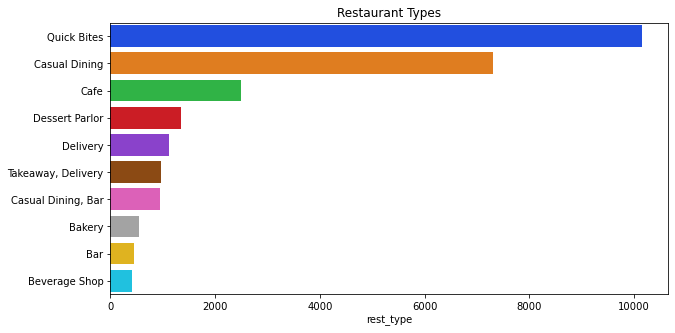

In [98]:
#Restaurants delivering Online or not
viz1 = df['rest_type'].value_counts().head(10)
display(viz1.to_frame())
plt.figure(figsize = (10,5))
sns.barplot(x = viz1, y = viz1.index, palette='bright')
plt.title("Restaurant Types")

Text(0.5, 1.0, 'Online Restaurant')

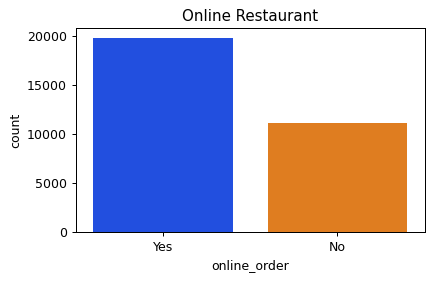

In [101]:
#Restaurants delivering online or not
plt.figure(figsize = (5,3), dpi=90)
sns.countplot(x = 'online_order', data = df, palette='bright')
plt.title("Online Restaurant")

Text(0.5, 1.0, 'Online vs Rating')

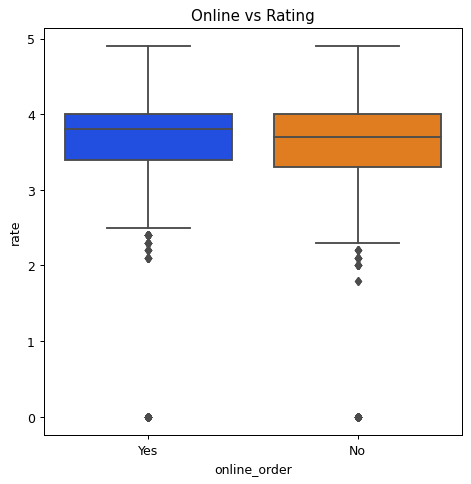

In [102]:
#Online order vs rating
plt.figure(figsize=(6,6), dpi=90)
sns.boxplot(x = 'online_order', y='rate',data=df, palette ='bright')
plt.title("Online vs Rating")


<AxesSubplot:title={'center':'Booking vs rating'}, xlabel='booking', ylabel='rate'>

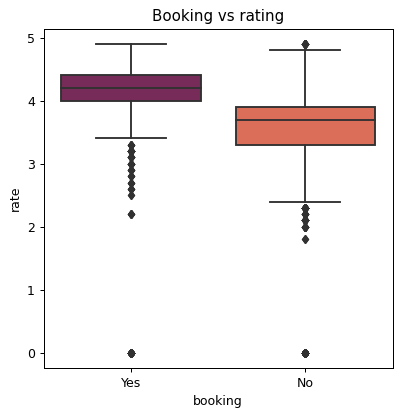

In [104]:
#Booking vs rating
plt.figure(figsize=(5,5),dpi=90)
plt.title('Booking vs rating')
sns.boxplot(x='booking',y='rate',data=df,palette='rocket')

,votes
location,
Koramangala 5th Block,1984132
Indiranagar,1129994
Koramangala 4th Block,591240
Church Street,555228
JP Nagar,479180


Text(0.5, 1.0, 'Best Location')

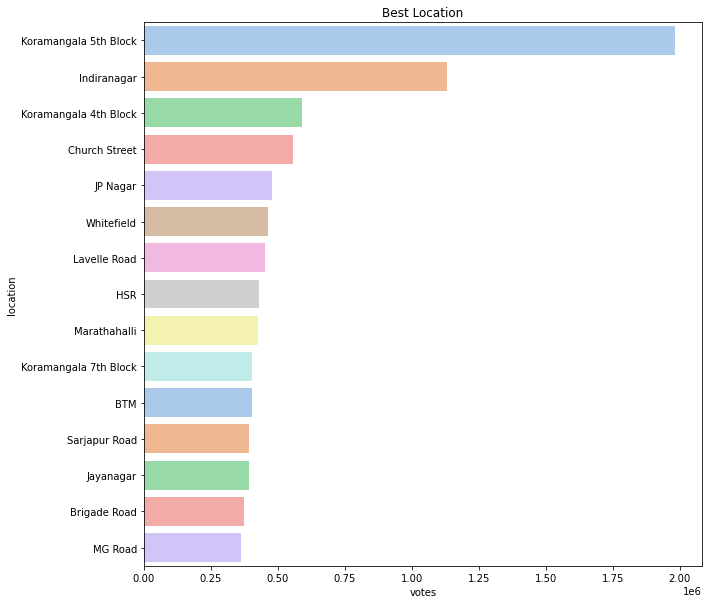

In [115]:
#Best location (Votes)
loc_vote = df.loc[:,['location', 'votes']]
loc_vote = df.groupby('location')['votes'].sum()
loc_vote = loc_vote.to_frame()
loc_vote=loc_vote.sort_values("votes",ascending=False)
display(loc_vote.head())
plt.figure(figsize=(10,10))
sns.barplot(x=loc_vote['votes'][:15], y=loc_vote.index[:15], palette='pastel', orient='h')
plt.title("Best Location")

<AxesSubplot:ylabel='restaurant'>

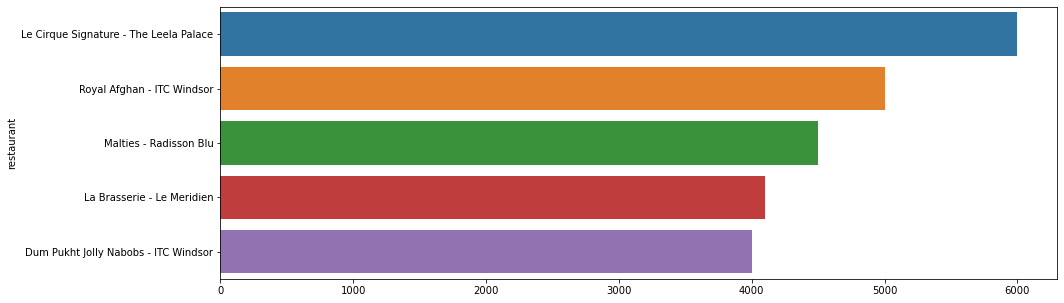

In [117]:
plt.figure(figsize=[15,5])
df1=df.groupby('restaurant')['approx_cost'].mean().sort_values(ascending=False).head(5)
sns.barplot(y=df1.index,x=df1.values)

<AxesSubplot:ylabel='Density'>

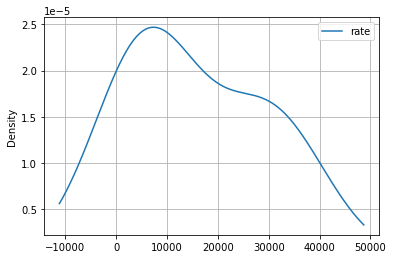

In [118]:
#Gaussian Rest Type and Rating
new=df.groupby('rest_type')['rate'].sum()
sorted_new=new.sort_values(ascending=False).head(5)
# sorted_new
sorted_new.plot(kind='kde',legend=True,grid=True)

d:\Program\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rate', ylabel='Density'>

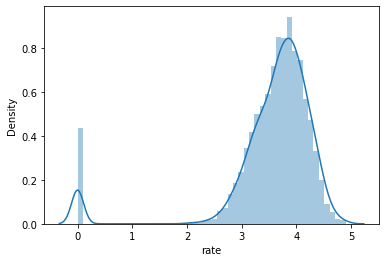

In [119]:
sns.distplot(df['rate'])